# Imports

In [68]:
# Reguläre Python Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn Imports, um den Datensatz in Trainings- und Testdaten zu splitten
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Import Metriken für die Leistungsbewertung der Modelle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# import confusion matrix plot function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random State for reproducibility
RANDOM_STATE = 42

# Testdata
TEST_RATIO = 0.3

# Load Data

In [69]:
# Lade die Daten
df = pd.read_csv("./data/dataset_cleaned.csv")

In [70]:
# Zeige die ersten Zeilen des Datensatzes an
df.head()

,Customer_ID,CCreditScore,CGeography,CGender,CAge,CTenure,CBalance,CNumOfProducts,CHasCrCard,CIsActiveMember,...,Transaction_Variance,Last_Login_Days_Ago,Support_Tickets_Count,Mobile_App_Usage_Hours,Onboarding_Month,Is_Holiday_Onboarding,Churn,CLV_Continuous,season,Churn_Category
0,CUST_000001,553.295220,France,Male,39,2,131008.168572,1,1,0,...,4.959478,1.094710,1,7.979899,8,0,0,21696.256022,Summer,No Churn
1,CUST_000002,552.939394,France,Male,33,4,118529.788812,1,0,0,...,9.866506,14.809607,0,11.565167,11,0,0,15918.891128,Autumn,No Churn
2,CUST_000003,688.745934,Spain,Male,40,1,-879.724555,2,1,1,...,6.178311,26.434273,0,3.331838,2,0,0,10361.315773,Winter,No Churn
3,CUST_000004,771.940664,France,Male,40,9,125563.132706,1,1,0,...,4.509500,18.540471,2,12.714742,1,1,0,15189.776245,Winter,No Churn
4,CUST_000005,484.092560,France,Male,55,5,95759.918567,1,0,1,...,18.786985,11.893918,1,0.719512,2,0,0,14631.814966,Winter,No Churn


In [71]:
# Zeigt Spalten in kompakter Form
df.columns

Index(['Customer_ID', 'CCreditScore', 'CGeography', 'CGender', 'CAge',
       'CTenure', 'CBalance', 'CNumOfProducts', 'CHasCrCard',
       'CIsActiveMember', 'CEstimatedSalary', 'Account_Age_Months',
       'Avg_Monthly_Transactions', 'Transaction_Variance',
       'Last_Login_Days_Ago', 'Support_Tickets_Count',
       'Mobile_App_Usage_Hours', 'Onboarding_Month', 'Is_Holiday_Onboarding',
       'Churn', 'CLV_Continuous', 'season', 'Churn_Category'],
      dtype='object')

# Classification mit KNN

In [72]:
# Teile den Datensatz auf in: feature set and target label
feature_set = ['CCreditScore', 'CAge', 'CTenure', 'CBalance', 'CNumOfProducts', 'CHasCrCard', 'CIsActiveMember', 'CEstimatedSalary', 'Account_Age_Months', 'Avg_Monthly_Transactions', 'Transaction_Variance', 'Last_Login_Days_Ago', 'Support_Tickets_Count', 'Mobile_App_Usage_Hours', 'Onboarding_Month', 'Is_Holiday_Onboarding']
X = df[feature_set]
y = df['Churn']

### Split Dataset

In [73]:
# Splitte den Datensatz in Trainings- und Testdaten auf. (30% Testdaten)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_RATIO, random_state=RANDOM_STATE, stratify=y) 

# Hinweis: stratify für nahezu gleichbleibende Klassenverteilung

Im Folgenden ist eine Skalierung für den kNN notwendig, da das kNN-Verfahren auf Distanzberechnungen zwischen Datenpunkten basiert. D. h. wenn Features unterschiedliche Skalen haben, dominieren Features mit größeren Werten die Distanzberechnung. Beispielsweise haben wir Werte von 500, 600 oder mehr für CCreditScore. Hingegen gibt die Spalte CAge Werte zwischen 0 - 99 her und CBalance besitzt Werte im sechstelligen Bereich. Ohne Skalierung würde zum Beispiel CBalance (größte Werte) die Distanzberechnung dominieren, während das Alter CAge kaum Einfluss hätte. Der StandardScaler transformiert jedes Feature zu: 

    z = (x - μ) / σ 

- μ = Mittelwert des Features
- σ = Standardabweichung des Features
- Resultat: Alle Features haben Mittelwert=0 und Standardabweichung=1

In [74]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train) # fit the Scaler only with training data, so that the test data does not influence the Scaler
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) #Test data is also scaled, but the Scaler is only fitted with the training data
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.147564,-0.285850,-1.044444,1.625313,-1.005393,0.636880,0.917601,-1.426230,-0.220732,-0.278522,-0.870573,-1.167129,-0.673216,-0.622370,0.151300,-0.457491
1,-0.668576,-0.088994,-1.735175,-0.188655,-1.005393,-1.570155,0.917601,-0.705432,1.421506,0.325907,-0.094954,0.592122,-0.673216,4.503164,1.598465,2.185837
2,-0.705256,-0.876420,-1.735175,-1.215618,-1.005393,0.636880,0.917601,-0.333382,-0.709266,-0.882952,-0.728602,0.613237,-0.673216,1.328963,1.598465,2.185837
3,0.603888,-0.088994,1.027747,-1.113671,2.770852,0.636880,-1.089798,-0.551571,0.832940,0.930336,-0.926062,-0.584120,-0.673216,0.742784,-1.585298,2.185837
4,0.284938,2.765427,1.027747,-1.156675,0.882730,0.636880,0.917601,-0.008005,-0.032986,0.023692,0.045004,-0.324695,0.631811,0.371262,1.598465,2.185837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,0.485102,0.009435,0.337017,0.943616,-1.005393,0.636880,0.917601,-1.721871,-0.835996,-1.487381,-0.154133,-0.987249,-0.673216,-0.023558,0.440733,-0.457491
5953,0.454703,-0.777992,-1.389809,-1.153625,0.882730,-1.570155,-1.089798,-1.843289,-0.697961,-0.278522,-0.360601,0.679037,-0.673216,1.122689,0.151300,-0.457491
5954,0.257414,-0.384278,-1.389809,-1.189544,0.882730,0.636880,-1.089798,1.177035,0.088171,-0.278522,-0.732263,-0.618792,-0.673216,-0.735827,0.151300,-0.457491
5955,-0.425596,0.206291,0.682382,0.874920,0.882730,0.636880,-1.089798,-1.600351,-0.979408,0.930336,-0.915039,0.055101,-0.673216,0.919506,-1.006432,-0.457491


### Berechne geeigneten n_neigbors

In [75]:
# Finde den besten Parameter für "n_neighbors" (oft auch "k" genannt)
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 15)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)
    
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

In [76]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_scaled, y_train)
    pred_i = knn_classifier.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, pred_i))

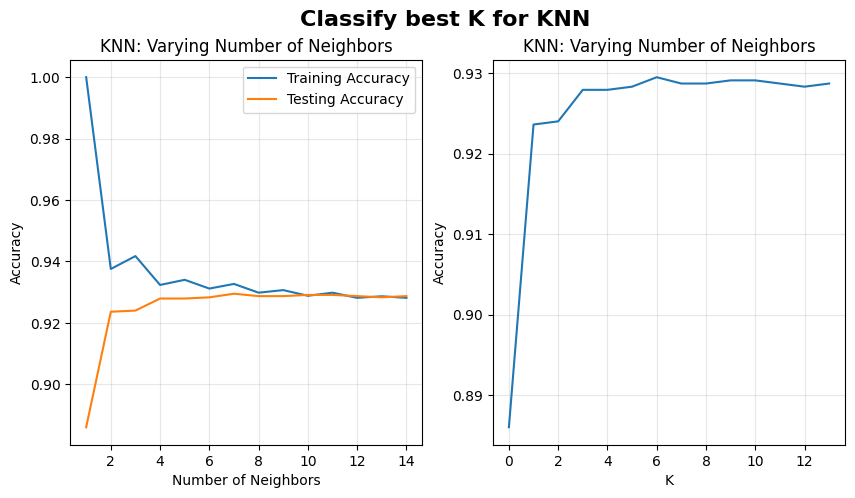

In [ ]:
# Boxplots zur Identifikation von Outliers in den demografischen Daten (hint: hätte man auch mit allen Werten auf einmal machen können)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Classify best K for KNN', fontsize=16, fontweight='bold')

# Anzahl der K-engsten Nachbarn
axes[0].plot(neighbors, train_accuracies.values(), label="Training Accuracy")
axes[0].plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
axes[0].set_title('KNN: Varying Number of Neighbors')
axes[0].legend()
axes[0].set_xlabel("Number of Neighbors")
axes[0].set_ylabel("Accuracy")
axes[0].grid(True, alpha=0.3)

# Fehlerrate für K-engste Nachbarn
axes[1].plot(accuracy)
axes[1].set_title('KNN: Varying Number of Neighbors')
axes[1].set_xlabel("K")
axes[1].set_ylabel("Accuracy")
axes[1].grid(True, alpha=0.3)

### Train KNN

In [78]:
# Create KNN model and fit the model to the training data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_test_knn = knn.predict(X_test_scaled)

### Eveluate KNN

In [79]:
# Calculate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_test_knn))
# Calculate model precision
print("Precision:", precision_score(y_test, y_pred_test_knn))
# Calculate model recall
print("Recall:", recall_score(y_test, y_pred_test_knn))
# Calculate model f1 score
print("F1-Score:", f1_score(y_test, y_pred_test_knn))

Accuracy: 0.9294947121034077
Precision: 0.7692307692307693
Recall: 0.053475935828877004
F1-Score: 0.1


In [80]:
# Überprüfe die Klassenverteilung
print("Klassenverteilung im Trainingsset:")
print(y_train.value_counts())
print(f"Anteil Churn: {y_train.mean():.4f}")

print("\nKlassenverteilung im Testset:")
print(y_test.value_counts())
print(f"Anteil Churn: {y_test.mean():.4f}")

Klassenverteilung im Trainingsset:
Churn
0    5521
1     436
Name: count, dtype: int64
Anteil Churn: 0.0732

Klassenverteilung im Testset:
Churn
0    2366
1     187
Name: count, dtype: int64
Anteil Churn: 0.0732


#### Auswertung: Unbalancierter Datensatz für KNN

**Accuracy (92,79%):** Die Accuracy von 92,79% zeigt auf den ersten Blick eine hohe Modellgenauigkeit. Allerdings ist der Datensatz stark unbalanciert (nur 7,2% Churn-Fälle). Demnach könnte das Modell einfach immer "Kein Churn" vorhersagen und hätte trotzdem ~92% Accuracy. Daher ist Accuracy bei unbalancierten Daten irreführend. Siehe dazu Anmerkungen bei Task 1 (Data-Cleaning)

**Precision (76,92%):** Von allen als "Churn" vorhergesagten Kunden sind tatsächlich 76,92% Churn-Fälle (True Positive). Das Modell sagt also exakt rund 77% richtig vorher.

**Recall (5,24%):** Das Modell erkennt nur 5,24% aller tatsächlichen Churn-Kunden. Das bedeutet, dass 94,76% aller Churn-Kunden übersehen werden!

**F1-Score (0,098):** Der niedrige Recall zieht den F1-Score nach unten. Da es der sog. Trade-Off zwischen Precision und Recall ist. Ein Wert von 0,098 ist sehr schlecht (Maximum wäre 1,0).

**Fazit:** Das KNN-Modell tendiert stark dazu, fast alle Kunden als "Kein Churn" zu klassifizieren. Es findet nur sehr wenige Churn-Fälle (niedriger Recall), aber die gefundenen sind meist korrekt (hohe Precision). Für das Unternehmen ist das kritisch, weil die meisten abwandernden Kunden nicht frühzeitig erkannt werden und somit gezielte Gegenmaßnahmen nicht eingeleitet werden können. Die hohe Precision ist zwar positiv, aber der sehr niedrige Recall macht das Modell insgesamt ungeeignet für die Churn-Vorhersage. Dies würde zu Kundenabwanderung, sinkenden Gewinnen und hohen Kosten durch verlorene Kunden führen.

# Classification mit Decision-Tree

In [81]:
# Create a Decision Tree classifier object
clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Train the model using training dataset
clf_tree = clf_tree.fit(X_train, y_train)

# Baseline
print(f"Baseline Tree Depth: {clf_tree.get_depth()}")
print(f"Baseline Leaf Nodes: {clf_tree.get_n_leaves()}")

Baseline Tree Depth: 24
Baseline Leaf Nodes: 413


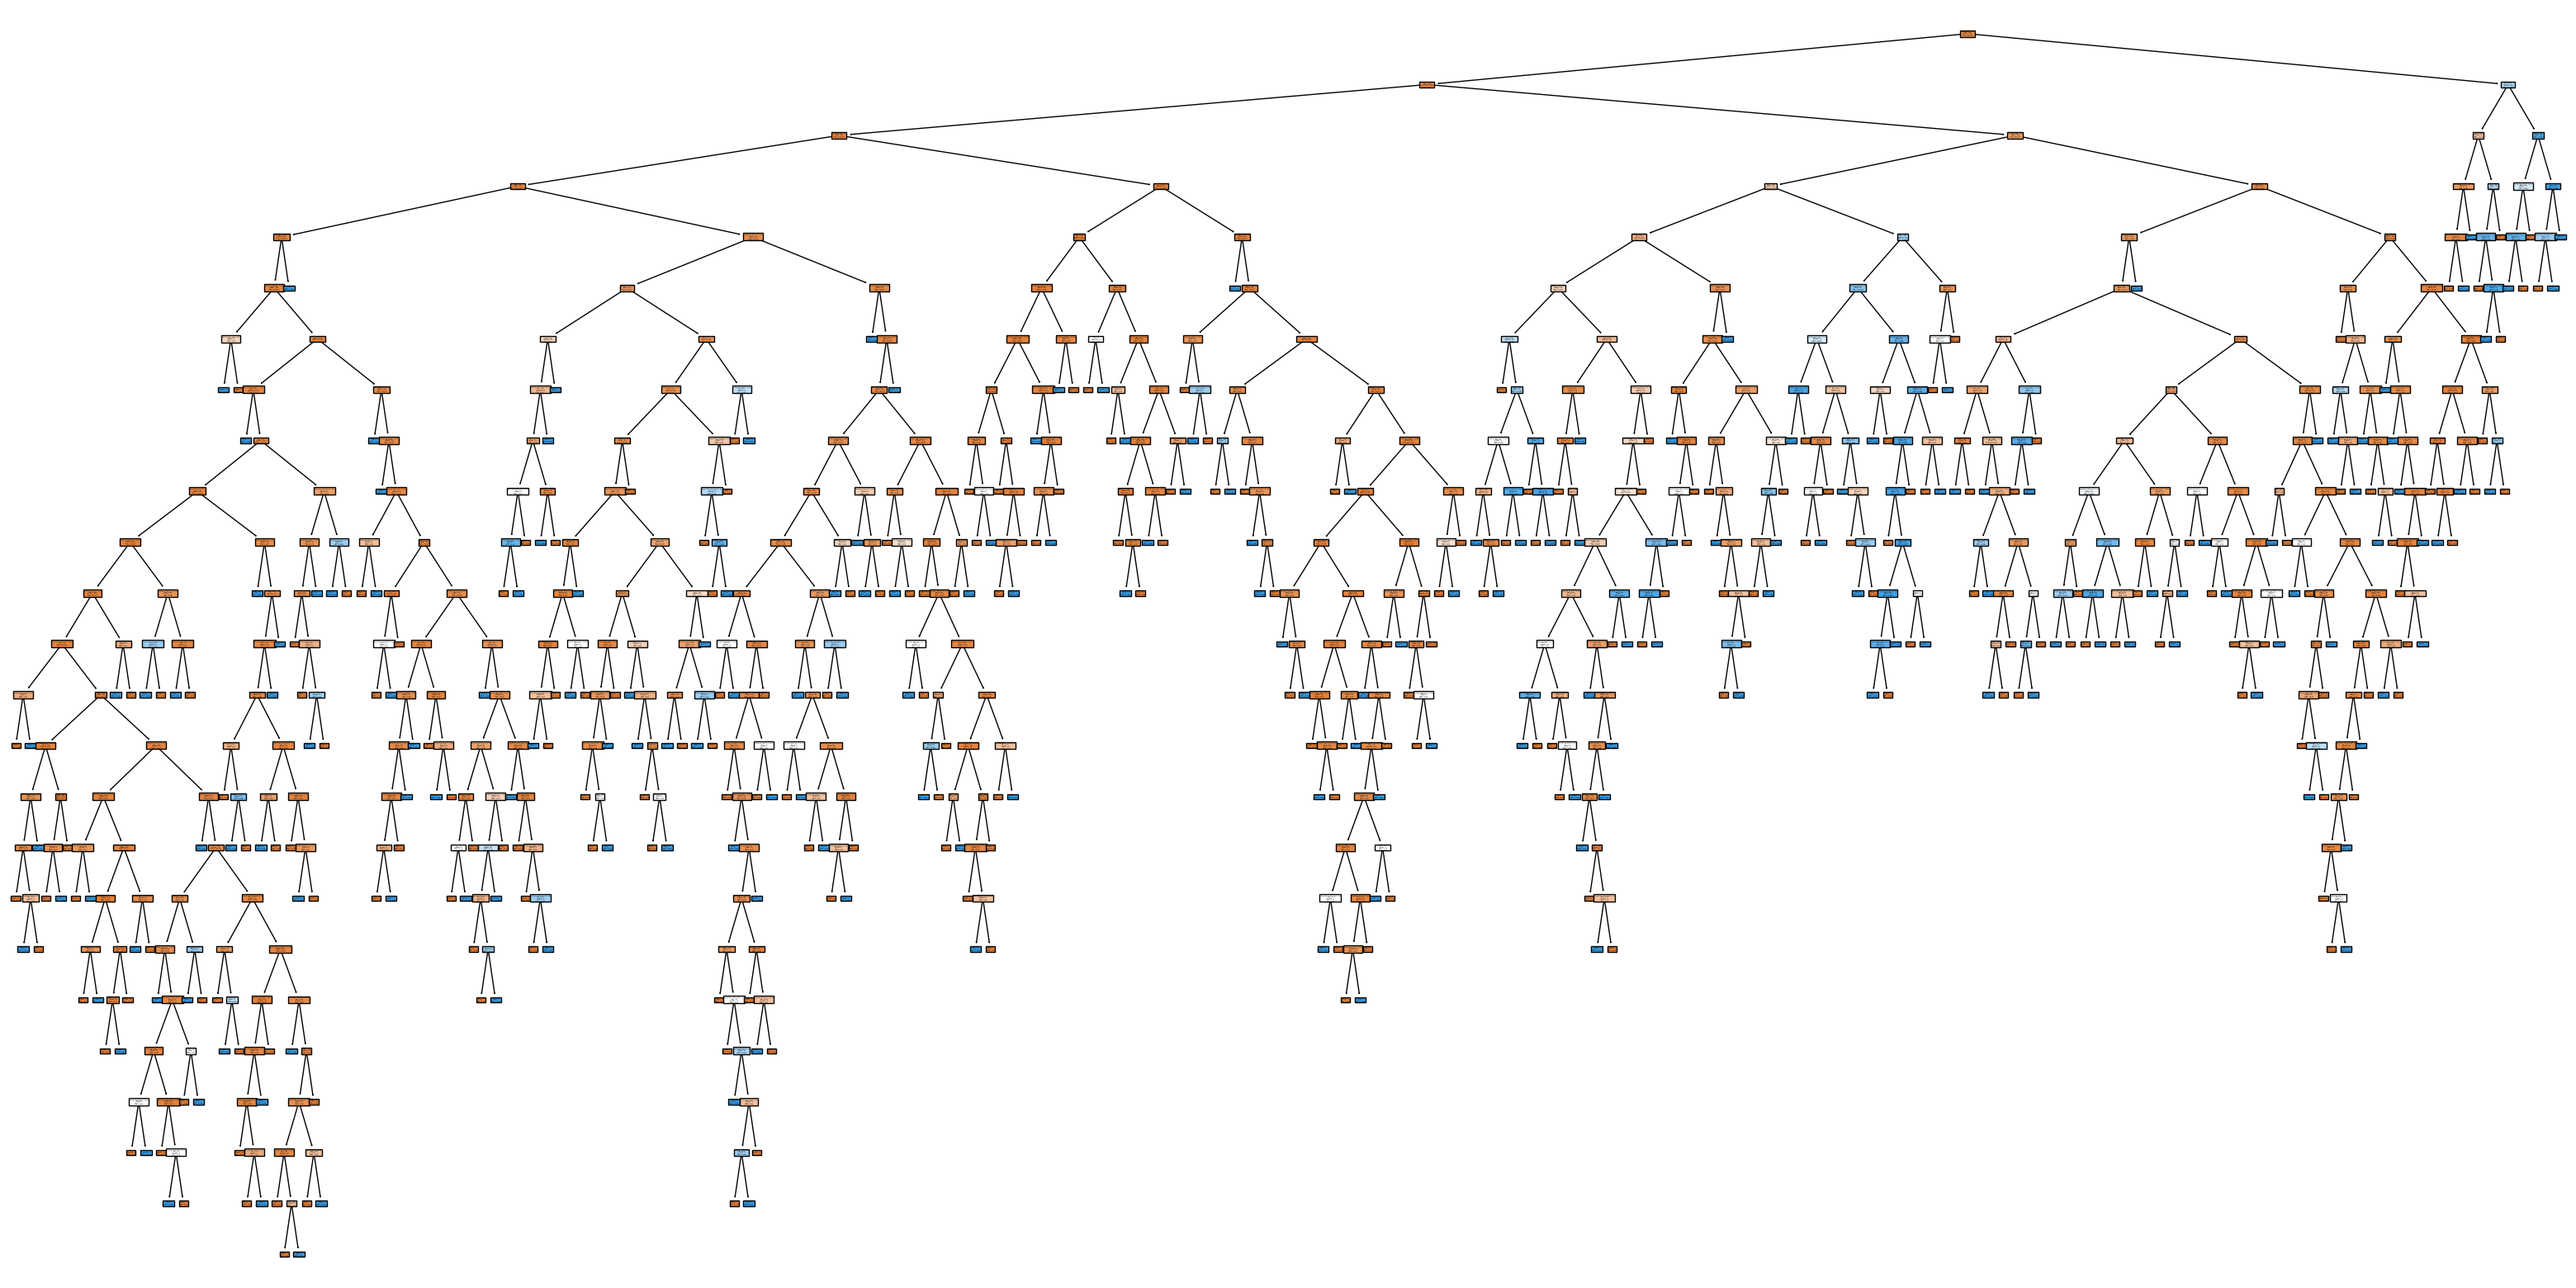

In [82]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf_tree, feature_names = X_train.columns, filled=True, class_names= ["Churn","No Churn"])
plt.show()

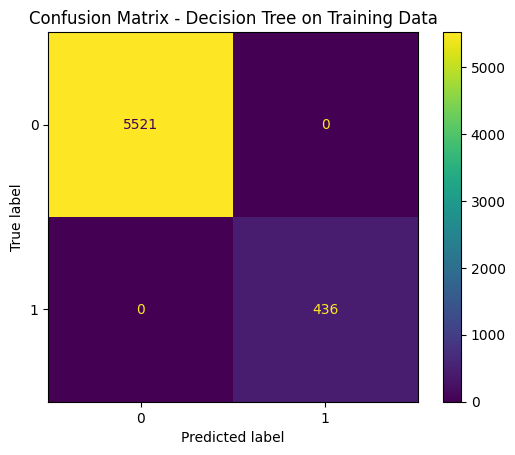

In [83]:

# Prädiziere das Ergebnis für die Trainingsdaten
y_pred_train_clf_tree = clf_tree.predict(X_train)

# Konfusions-Matrix visualisieren auf Trainingsdaten
cm = confusion_matrix(y_train, y_pred_train_clf_tree)
ConfusionMatrixDisplay.from_estimator(clf_tree, X_train, y_train, values_format='d')
plt.title("Confusion Matrix - Decision Tree on Training Data")
plt.show()


Klare Tendenz des Overfittings, da es weder False Negative noch False Positive in den Trainingsdaten gibt. Demnach erkennt das Modell immer alles richtig. Dies ist im Plot des Baumes (siehe oben) schon ersichtlich, da er viel zu fein granular aufgeteilt ist. Dies sollte später ggf. bei den Hyperparametern berücksichtigt werden. Schließlich wird das Modell nicht gut auf neuen Daten (Testdaten) generalisieren können. 

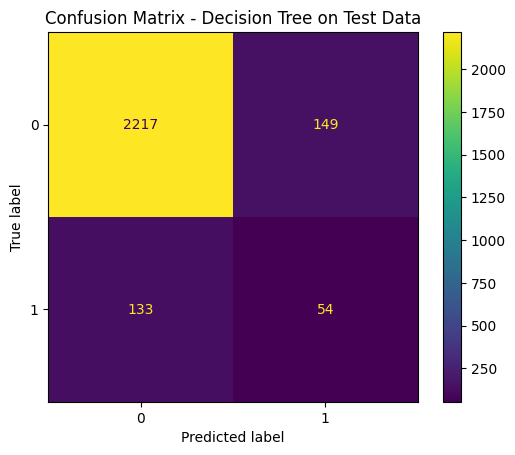

In [84]:
# Prädiziere das Ergebnis für die Testdaten
y_pred_test_clf_tree = clf_tree.predict(X_test)

# Konfusions-Matrix visualisieren auf Testdaten
cmm = confusion_matrix(y_test, y_pred_test_clf_tree)
ConfusionMatrixDisplay.from_estimator(clf_tree, X_test, y_test, values_format='d')
plt.title("Confusion Matrix - Decision Tree on Test Data")
plt.show()

In [85]:
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_clf_tree))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_clf_tree))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_clf_tree))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_clf_tree))

Accuracy: 0.8895417156286721
Precision: 0.2660098522167488
Recall: 0.2887700534759358
F1-Score: 0.27692307692307694


#### Auswertung: Unbalancierter Datensatz für Decision Tree

**Accuracy (88,36%):** Eine Accuracy von 88,95% suggeriert vorerst eine hohe Modellgenauigkeit. Allerdings ist auch hier Vorsicht geboten. Der Datensatz ist stark unbalanciert. Folglich ist das Ergebnis von untergeordneter Bedeutung.

**Precision (28,97%):** Von allen als "Churn" vorhergesagten Kunden sind tatsächlich 28,97% Churn-Fälle. Das Modell misst also zu rund 29% der Fälle exakt. Das ist nicht gut.

**Recall (38,22%):** Das Modell erkennt 38,22% aller tatsächlichen Churn-Kunden. Das bedeutet, dass 61,78% aller Churn-Kunden übersehen werden!

**F1-Score (0,33):** sog. Trade-Off oder harmonisches Mittel zwischen Precision und Recall (Maximum wäre 1,0). 

**Fazit:** Das Decision Tree Modell erzielt mit einer Accuracy von 88,36% auf den ersten Blick eine scheinbar gute Vorhersagegenauigkeit. Aufgrund des stark unbalancierten Datensatzes ist diese Kennzahl jedoch wenig aussagekräftig. Die niedrige Precision von 28,97% und der Recall von 38,22% zeigen deutlich, dass das Modell nur einen kleinen Teil der tatsächlichen Churn-Kunden korrekt identifiziert und viele Fehlalarme produziert. Der F1-Score von 0,33 bestätigt das unausgewogene Verhältnis zwischen Precision und Recall und verdeutlicht die eingeschränkte Leistungsfähigkeit des Modells in seiner aktuellen Form. Insgesamt ist das Modell für die zuverlässige Vorhersage von Kundenabwanderung nicht ausreichend geeignet.

Auch wenn Random Forest grundsätzlich gut mit komplexen Daten umgehen kann, empfiehlt es sich, gezielte Maßnahmen zur Behandlung des unbalancierten Datensatzes zu ergreifen. Dazu gehören beispielsweise Oversampling der Minderheitsklasse (z. B. SMOTE), Anpassung der Klassen-Gewichte im Modell oder Threshold-Tuning, um Precision und Recall besser auszubalancieren. Zusätzlich sollte der Einsatz komplexerer Modelle wie Random Forest oder Gradient Boosting, die robuster gegenüber Overfitting und Datenungleichgewicht sind, geprüft werden. Nur durch solche Optimierungen kann das Unternehmen die Vorhersagequalität verbessern und somit die Kundenabwanderung effektiver identifizieren und adressieren.

# Classification mit Logistic Regression

In [86]:
# Instanziere die Logistische Regression
clf_logr = LogisticRegression(solver='lbfgs', max_iter=500)

# Trainiere das Modell mit den skalierten Trainingsdaten
clf_logr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [87]:
# Predict the y variable for the test dataset
y_pred_train_gnb = clf_logr.predict(X_train_scaled)
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_train, y_pred_train_gnb))
# Calculate model precision
print("Precision:",precision_score(y_train, y_pred_train_gnb))
# Calculate model recall
print("Recall:",recall_score(y_train, y_pred_train_gnb))
# Calculate model f1 score
print("F1-Score:",f1_score(y_train, y_pred_train_gnb))

Accuracy: 0.9259694477085781
Precision: 0.2222222222222222
Recall: 0.0045871559633027525
F1-Score: 0.008988764044943821



Das Trainingsergebnis zeigt eine sehr hohe Accuracy bei gleichzeitig extrem niedrigem Recall und F1-Score, was darauf hindeutet, dass das Modell die Minderheitsklasse „Churn“ kaum erkennt und fast alle Beispiele als „Nicht Churn“ klassifiziert. Aufgrund dieser starken Klassenungleichheit und der schlechten Erkennung im Training ist zu erwarten, dass die Testergebnisse ein ähnliches Muster aufweisen werden: hohe Accuracy, aber sehr geringe Fähigkeit, tatsächliche Churn-Fälle zu identifizieren. Insgesamt deutet dies darauf hin, dass das Modell in seiner aktuellen Form wenig prädiktive Aussagekraft für die Churn-Erkennung besitzt.

In [88]:
# Predict the y variable for the test dataset
y_pred_test_logr = clf_logr.predict(X_test_scaled)
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred_test_logr))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred_test_logr))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred_test_logr))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred_test_logr))

Accuracy: 0.9259694477085781
Precision: 0.25
Recall: 0.0053475935828877
F1-Score: 0.010471204188481676



Das Modell erzielt auf den Testdaten eine hohe Accuracy von etwa 92,4%, klassifiziert jedoch keinen einzigen Churn-Fall korrekt. Precision, Recall und F1-Score sind daher alle null, was zeigt, dass das Modell zwar die Mehrheitsklasse gut erkennt, aber völlig versagt, die wichtige Minderheitsklasse „Churn“ zu identifizieren. Dieses Ergebnis unterstreicht die Problematik des starken Klassenungleichgewichts und die Notwendigkeit spezialisierter Maßnahmen zur Verbesserung der Churn-Erkennung.

In [89]:
np.unique(y_pred_test_logr, return_counts=True)

(array([0, 1]), array([2549,    4]))

Das Ergebnis zeigt, dass , dass dein Modell auf den Testdaten insgesamt 2550 Mal die Klasse „0“ (kein Churn) und nur 3 Mal die Klasse „1“ (Churn) vorhergesagt hat. Obwohl das Modell 3 positive Vorhersagen (Klasse 1) gemacht hat, waren diese keine korrekten Treffer (keine True Positives), sondern alle falsch (False Positives). Deshalb ist Precision = 0 (keine richtigen positiven Vorhersagen), Recall = 0 (keine tatsächlichen Churn-Fälle erkannt) und F1-Score = 0. Das Modell trifft zwar vereinzelt Vorhersagen für Churn, aber diese sind falsch. Die Fähigkeit, echte Churn-Kunden zu erkennen, ist somit praktisch nicht vorhanden. Dies bestätigt erneut die Notwendigkeit, das Modell und/oder die Datenvorverarbeitung (z. B. Klassenungleichgewicht) zu verbessern.

# Anwendung von SMOTE (Oversampling-Verfahren)


SMOTE (Synthetic Minority Over-sampling Technique) ist eine Methode zur Behandlung von Klassenungleichgewichten, bei der künstliche neue Beispiele der Minderheitsklasse erzeugt werden, indem neue Datenpunkte zwischen bestehenden Minderheitsklasseninstanzen interpoliert werden. Dadurch wird die Minderheitsklasse künstlich vergrößert, was dem Modell hilft, diese besser zu erkennen.

In [90]:
# Import SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) # type: ignore

print("Vor SMOTE:", X_train.shape, y_train.value_counts())
print("Nach SMOTE:", X_train_res.shape, pd.Series(y_train_res).value_counts()) # type: ignore

Vor SMOTE: (5957, 16) Churn
0    5521
1     436
Name: count, dtype: int64
Nach SMOTE: (11042, 16) Churn
0    5521
1    5521
Name: count, dtype: int64


Die Anwendung von SMOTE auf den Trainingsdatensatz war erfolgreich. Vor SMOTE bestand der Datensatz aus 5.957 Beispielen mit einem starken Klassenungleichgewicht: 5.525 Nicht-Churn-Fällen (Klasse 0) und nur 432 Churn-Fällen (Klasse 1). Nach der Anwendung von SMOTE wurde die Anzahl der Churn-Fälle künstlich auf 5.525 erhöht, sodass beide Klassen nun ausgeglichen sind. Dieses balancierte Trainingsset sollte dem Modell ermöglichen, Churn-Kunden besser zu erkennen und dadurch die Werte von Precision, Recall und F1-Score zu verbessern.

# Classification mit Logistischer Regression nach SMOTE

In [91]:
# Erneutes Aufteilen der Daten in Trainings- und Testdaten (wird hier wiederholt, um sicherzustellen, dass die Testdaten unverändert bleiben)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_RATIO, random_state=RANDOM_STATE, stratify=y)

# Daten skalieren nach SMOTE (Nur für KNN und Log. Regression angewendet)
scaler = StandardScaler()

# fit the Scaler only with training data, so that the test data does not influence the Scaler
scaler.fit(X_train_res) # type: ignore
X_train_res_scaled = scaler.transform(X_train_res) 
X_test_scaled = scaler.transform(X_test)

In [92]:
# Instanziere die Logistische Regression
clf = LogisticRegression(max_iter=500, random_state=42)

# Trainiere das Modell mit den skalierten Trainingsdaten nach SMOTE
clf.fit(X_train_res_scaled, y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [93]:
# Vorhersagen auf Testdaten machen und Leistung messen
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.7457892675283979
Precision: 0.14786585365853658
Recall: 0.5187165775401069
F1-Score: 0.23013048635824437


#### Auswertung: Logistische Regression nach SMOTE

Deine Ergebnisse nach Anwendung von SMOTE und Training der logistischen Regression zeigen einen deutlichen Fortschritt im Vergleich zu vorher.

**Accuracy (74,58%):** von ca. 74,6 % ist zwar niedriger als zuvor, was bei ausgeglicheneren Klassenverteilungen häufig vorkommt, da das Modell nicht mehr durch die dominante Mehrheitklasse „kein Churn“ „getäuscht“ wird.

**Precision (14,79):** Die Precision von ca. 14,8 % zeigt, dass von allen als „Churn“ vorhergesagten Fällen etwa 15 % tatsächlich Churn-Fälle sind. Dies ist zwar noch ausbaufähig, aber ein Fortschritt gegenüber nahezu keiner positiven Erkennung.

**Recall (51,87%):** Der deutlich verbesserte Recall von ca. 51,9 % bedeutet, dass das Modell jetzt mehr als die Hälfte aller tatsächlichen Churn-Kunden korrekt erkennt, was für die Anwendung in einem Unternehmen ein wichtiger Schritt ist.

**F1-Score (0,23):** Der F1-Score von ca. 0,23 zeigt insgesamt eine bessere Balance zwischen Precision und Recall, auch wenn noch Optimierungspotenzial besteht.

**Fazit:** Durch SMOTE und die anschließende Skalierung konnte das Modell wesentlich besser auf die Minderheitsklasse „Churn“ lernen und ist nun in der Lage, einen signifikanten Anteil der Churn-Kunden zu identifizieren. Die niedrigere Accuracy ist ein erwarteter Effekt bei ausgeglicheneren Klassen, der durch die Verbesserung von Recall und F1-Score mehr als ausgeglichen wird.

# Classification mit Decision Tree nach SMOTE

In [94]:
# Decision Tree Classifier instanziieren und trainieren mit resampleten Daten
clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_tree.fit(X_train_res, y_train_res)

# Baseline Informationen zum Baum
print(f"Tree Depth: {clf_tree.get_depth()}")
print(f"Leaf Nodes: {clf_tree.get_n_leaves()}")

Tree Depth: 28
Leaf Nodes: 991


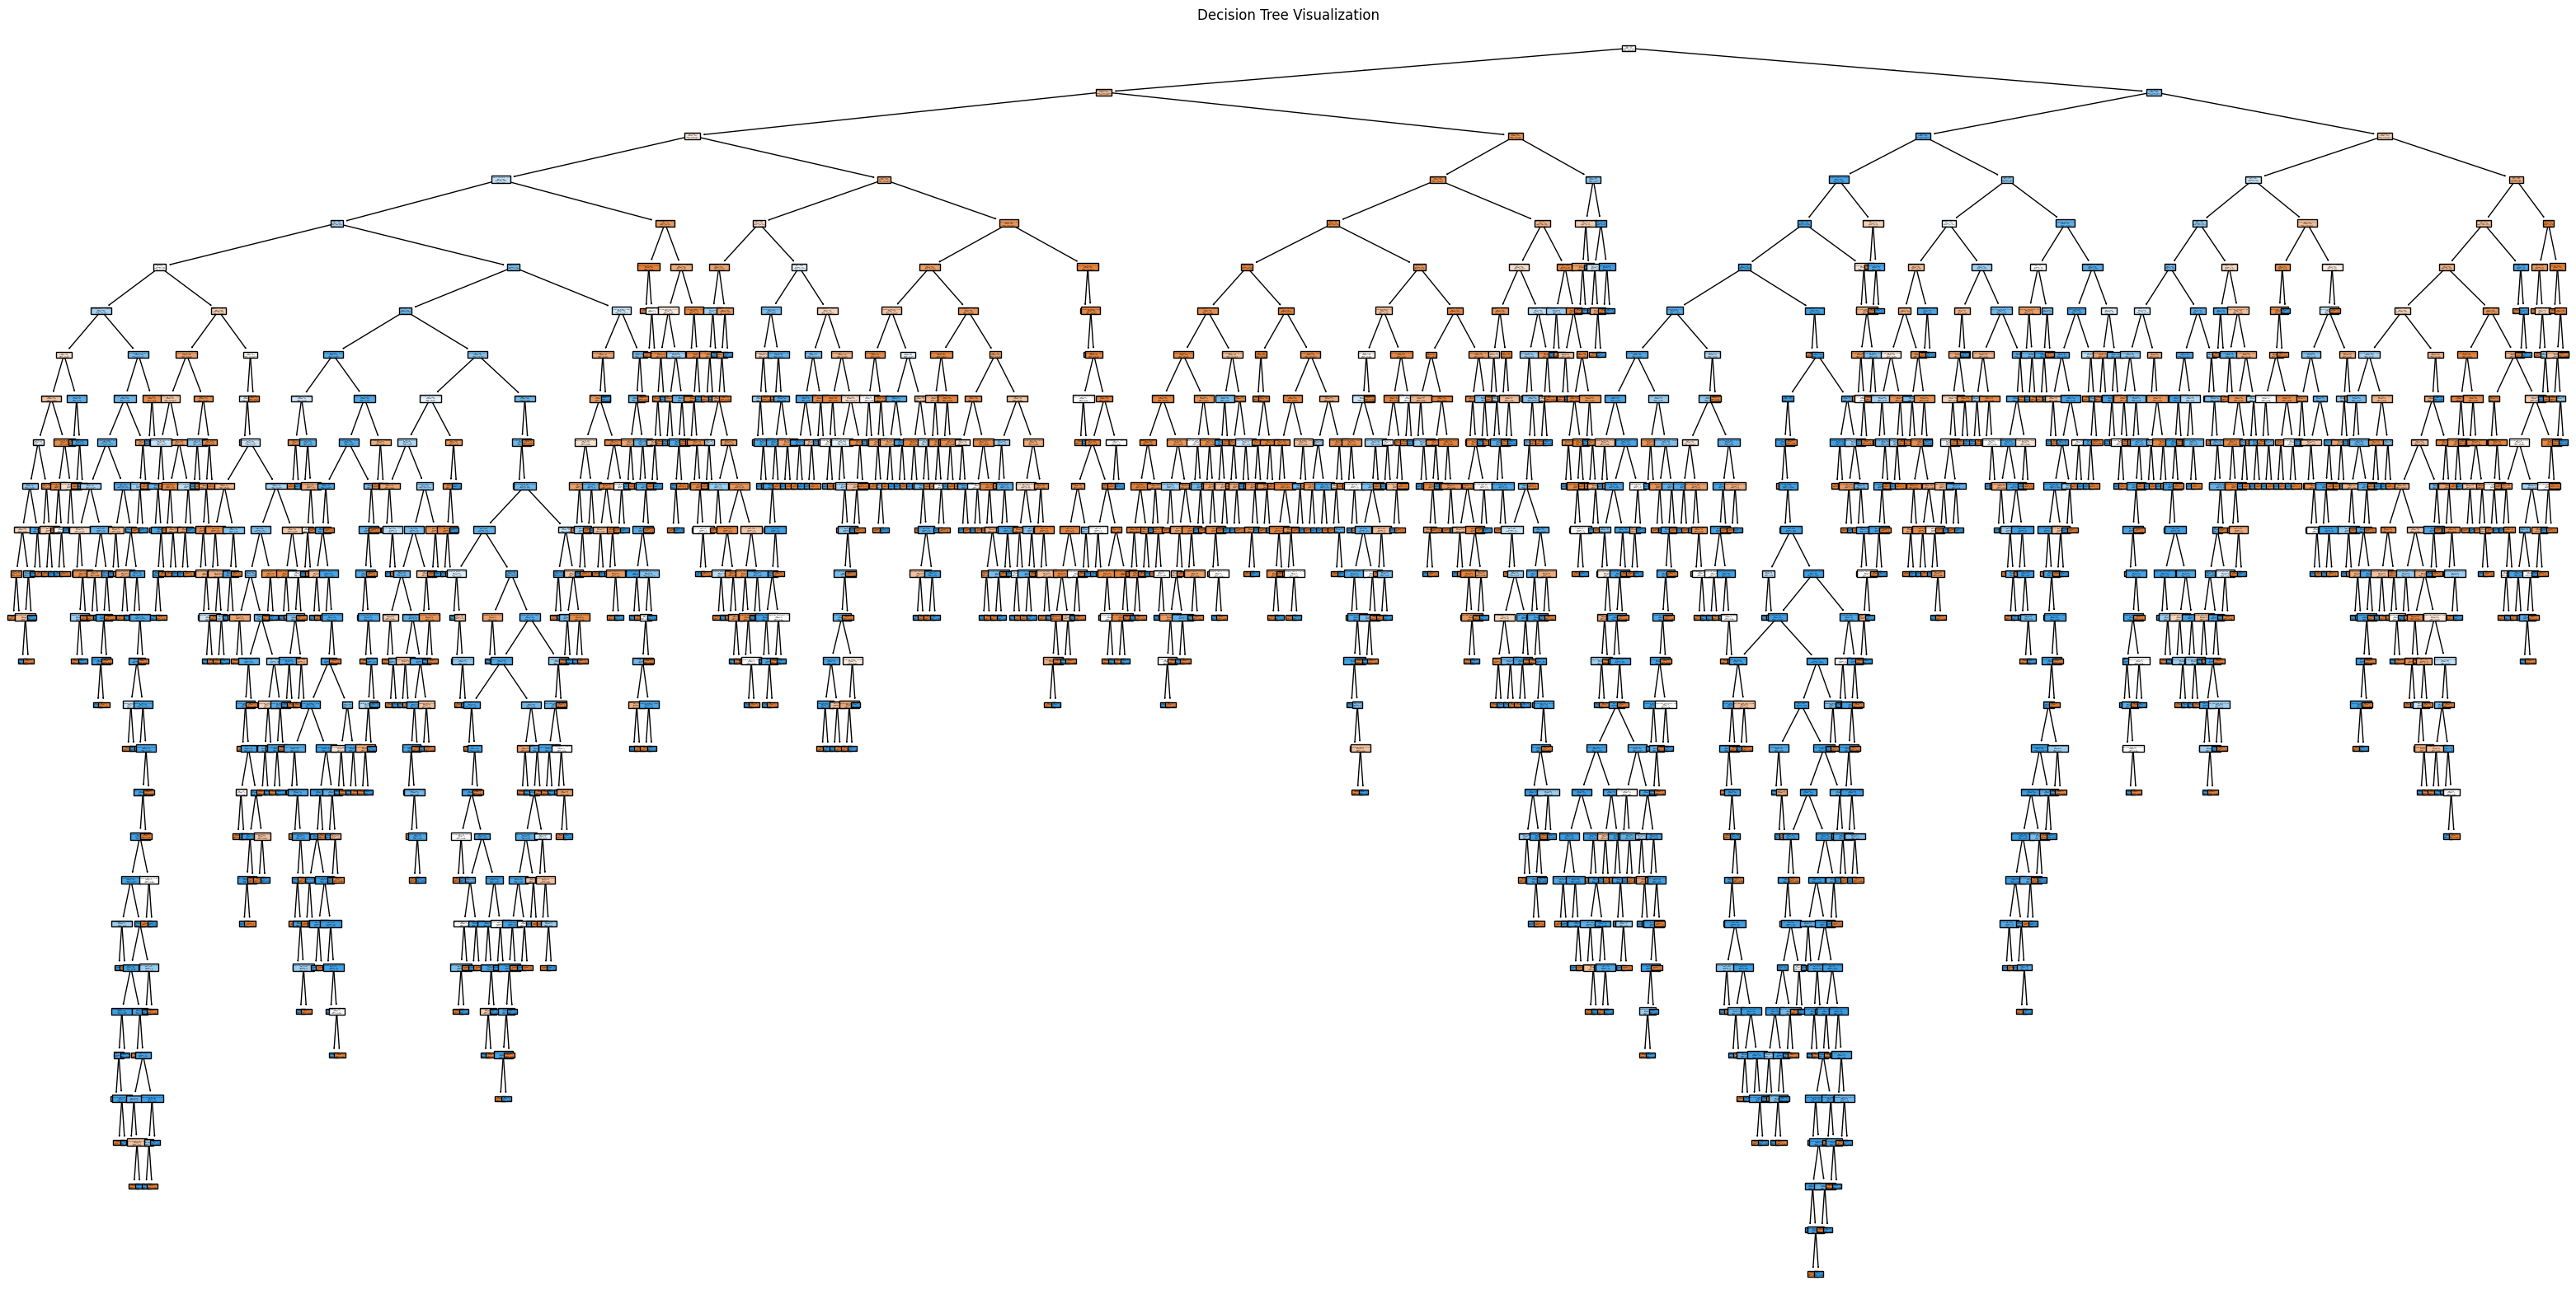

In [95]:
# Baum visualisieren
plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf_tree, feature_names=X_train.columns, filled=True, class_names=["No Churn", "Churn"])
plt.title("Decision Tree Visualization")
plt.show()

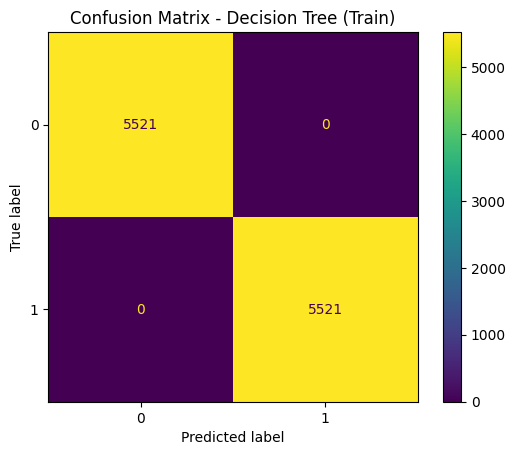

In [96]:
# Vorhersage auf Trainingsdaten
y_pred_train_clf_tree = clf_tree.predict(X_train_res)

# Konfusionsmatrix Trainingsdaten
ConfusionMatrixDisplay.from_estimator(clf_tree, X_train_res, y_train_res, values_format='d')
plt.title("Confusion Matrix - Decision Tree (Train)")
plt.show()

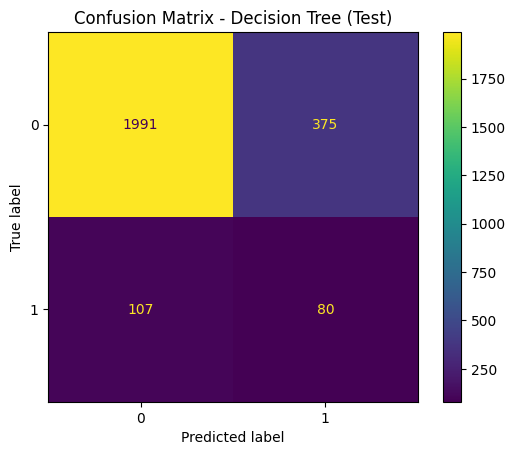

In [97]:
# Vorhersage auf Testdaten
y_pred_test_clf_tree = clf_tree.predict(X_test)

# Konfusionsmatrix Testdaten
ConfusionMatrixDisplay.from_estimator(clf_tree, X_test, y_test, values_format='d')
plt.title("Confusion Matrix - Decision Tree (Test)")
plt.show()

In [98]:
# Performance Metriken auf Testdaten
print("Accuracy:", accuracy_score(y_test, y_pred_test_clf_tree))
print("Precision:", precision_score(y_test, y_pred_test_clf_tree))
print("Recall:", recall_score(y_test, y_pred_test_clf_tree))
print("F1-Score:", f1_score(y_test, y_pred_test_clf_tree))

Accuracy: 0.8112025068546808
Precision: 0.17582417582417584
Recall: 0.42780748663101603
F1-Score: 0.24922118380062305


#### Auswertung: Decision Tree nach SMOTE

**Accuracy (81,12%):** Nach Ausgleich des Datensatzes mit SMOTE sinkt die Accuracy erwartungsgemäß auf 81,12%. Dies ist typisch, da das Modell nun nicht mehr die Mehrheitsklasse bevorzugt, sondern auf ausgeglichenen Daten trainiert wurde.

**Precision (17,58%):** Die Precision sinkt auf 17,58%, was bedeutet, dass ein größerer Anteil der als „Churn“ vorhergesagten Kunden tatsächlich keine churnenden Kunden sind. Es entstehen mehr Fehlalarme.

**Recall (42,78%):** Der Recall verbessert sich deutlich auf 42,78%, sodass nun deutlich mehr tatsächliche Churn-Kunden erkannt werden.

**F1-Score (0,25):** Der F1-Score bleibt moderat, da eine Verbesserung im Recall durch eine Verschlechterung der Precision ausgeglichen wird.

**Fazit:** Das Decision Tree Modell zeigt vor SMOTE eine hohe Accuracy, die jedoch durch das starke Klassenungleichgewicht verzerrt ist. Die niedrigen Werte bei Precision und Recall verdeutlichen, dass das Modell die Minderheitsklasse „Churn“ nur unzureichend erkennt. Nach Anwendung von SMOTE verbessert sich der Recall deutlich, was auf eine bessere Erkennung von Churn-Kunden hinweist. Gleichzeitig sinkt die Accuracy, und die Precision verschlechtert sich, was zu mehr Fehlalarmen führt. Die stark gestiegene Anzahl der Leaf Nodes (von ca. 400 auf 991) und die fehlenden False Positives und False Negatives in der Trainings-Confusion-Matrix deuten auf deutliches Overfitting hin. Das Modell ist dadurch zwar sehr genau auf die Trainingsdaten angepasst, generalisiert jedoch schlecht auf neue Daten.

Um Overfitting zu vermeiden und die Modellleistung zu verbessern, sollten Maßnahmen wie Baumschnitt (Pruning), Begrenzung der Baumtiefe und die Erhöhung der minimalen Samples pro Blatt geprüft werden. Zusätzlich ist der Einsatz robusterer Algorithmen wie Random Forest oder Gradient Boosting zu empfehlen, die besser mit Ausgleich von Klassenungleichgewichten und Overfitting umgehen können. Nur durch solche Optimierungen kann das Unternehmen die Vorhersagequalität verbessern und Churn-Kunden effektiver identifizieren und adressieren.

# Classification mit KNN nach SMOTE

In [111]:
# Finde den besten Parameter für "n_neighbors" (oft auch "k" genannt)
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 25)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_res_scaled, y_train_res)

    train_accuracies[neighbor] = knn.score(X_train_res_scaled, y_train_res)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

In [ ]:
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_res_scaled, y_train_res)
    pred_i = knn_classifier.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, pred_i))

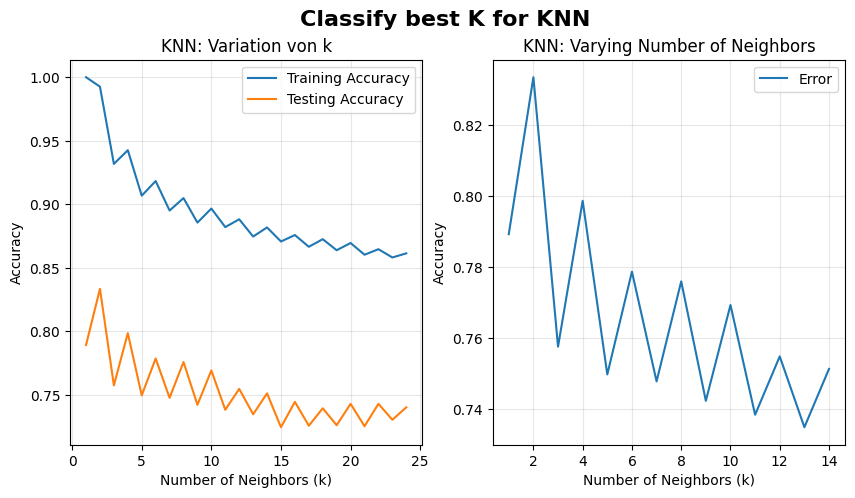

In [120]:
# Boxplots zur Identifikation von Outliers in den demografischen Daten (hint: hätte man auch mit allen Werten auf einmal machen können)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Classify best K for KNN', fontsize=16, fontweight='bold')

# Plot der Trainings- und Testgenauigkeiten
axes[0].plot(neighbors, [train_accuracies[k] for k in neighbors], label='Training Accuracy')
axes[0].plot(neighbors, [test_accuracies[k] for k in neighbors], label='Testing Accuracy')
axes[0].set_xlabel('Number of Neighbors (k)')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('KNN: Variation von k')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
    
# Fehlerrate für K im rechten Subplot
axes[1].plot(range(1, len(accuracy) + 1), accuracy, label='Error')
axes[1].set_xlabel('Number of Neighbors (k)')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('KNN: Varying Number of Neighbors')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.show()

In [103]:
# 5. Modell mit ausgewähltem k (z.B. k=7) trainieren
best_k = 7
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_res_scaled, y_train_res)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [104]:
# Modell auf Testdaten evaluieren
y_pred_test_knn = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_test_knn))
print("Precision:", precision_score(y_test, y_pred_test_knn))
print("Recall:", recall_score(y_test, y_pred_test_knn))
print("F1-Score:", f1_score(y_test, y_pred_test_knn))

Accuracy: 0.7477477477477478
Precision: 0.15431164901664146
Recall: 0.5454545454545454
F1-Score: 0.24056603773584906
